# Random Forest Regression
- Random Forest is the collection of **randomly trained decision trees** and finds the best out of that by the average.
- Hence, random forest is the version of **ensemble learning**! Yes, ensemble learning is the process of training the same or different algorithm multiple times and selecting the best out of it.
- Algorithm type: **Regression**
- Number of the independent variable (X) = **N**
- Number of dependent variable (Y) = **1**
## Steps
1. Pick at random K data points from the Training set
2. Build the Decision Tree associated with these K data points
3. Choose the number N tree for tree you want to build and repeat STEPS 1 & 2
4. For a new data point, make each one of your N trees predicts the value of Y for the data point in question and assign the new data point the average across all the predicted Y values. 

## Illustration
- Let assume that we have two different decision trees build on different data points.
- From the given picture, we can understand that one tree is tall and another has wide branches.

<img src="../static/random_forest_tree_illution_1.png" alt="random_forest_tree_illution_1.png" width="500">
<img src="../static/random_forest_tree_illution_2.png" alt="random_forest_tree_illution_2.png" width="500">

- Similarly, we can generate an N number decision tree from the input dataset.
- But, We all know the forest is the combination of multiple trees. 🌳🌲🌴🎋 → 🏕️

<img src="../static/random_forest_illution.png" alt="random_forest_illution.png" width="1000">


# Data preprocessing
✔️ Import the necessary libraries.

✔️ Load dataset (Position_Salaries.csv).

❌ Our dataset doesn't have any missing so, we can skip that step.

❌ We have categorical string data, but they are already labeled in another column called Level so, we can skip that step as well.

❌ We only have 10 data when we split this dataset into training and test, our algorithm doesn't give proper prediction! So, we can skip this step as well.

❌ Random forest regression is non equation type so, we don't need to perform feature scaling for this algorithm.

In [1]:
# Import the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load dataset (Position_Salaries.csv).
dataset = pd.read_csv(r"../dataset/Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values # [row, column]
Y = dataset.iloc[:, -1].values
print("Dataset", dataset, "X", X, "Y", Y, sep="\n")

Dataset
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
X
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
Y
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Train Random Forest Regression Model

In [3]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10) # n_estimators -> number of trees to train the forest
regressor.fit(X, Y)

RandomForestRegressor(n_estimators=10)

## Test Random Forest Regression Model

In [4]:
regressor.predict([[5.6], [6.0], [6.5]])

array([134000., 134000., 170000.])

## Check and visualize result

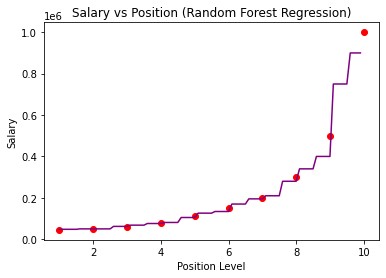

In [5]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'purple')
plt.title("Salary vs Position (Random Forest Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

From the above result, you can understand that algorithm is generating the boundaries as we have seen in the decision tree result. But, now the random forest is much better than that because the model is not tightly fitted to the dataset. 